<a href="https://colab.research.google.com/github/guifav/roger/blob/main/Roger_escritor_de_artigos_para_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação de Agente de IA que escreve artigos para Blogs otimizados para SEO

Este agente foi criado como base para compreensão e utilização do mecanismo de funcionamento de agentes. Suas funcionalidades poderão facilmente ser expandidas.

Recentemente publiquei dois artigos sobre os Agentes de IA:
- [Guia passo a passo](https://www.guilhermefavaron.com.br/post/como-criar-agentes-ia-guia-passo-a-passo)
- [Por onde começar](https://www.guilhermefavaron.com.br/post/agentes-ia-por-onde-comecar)

Também, criei um vídeo explicativo sobre os LLMs.

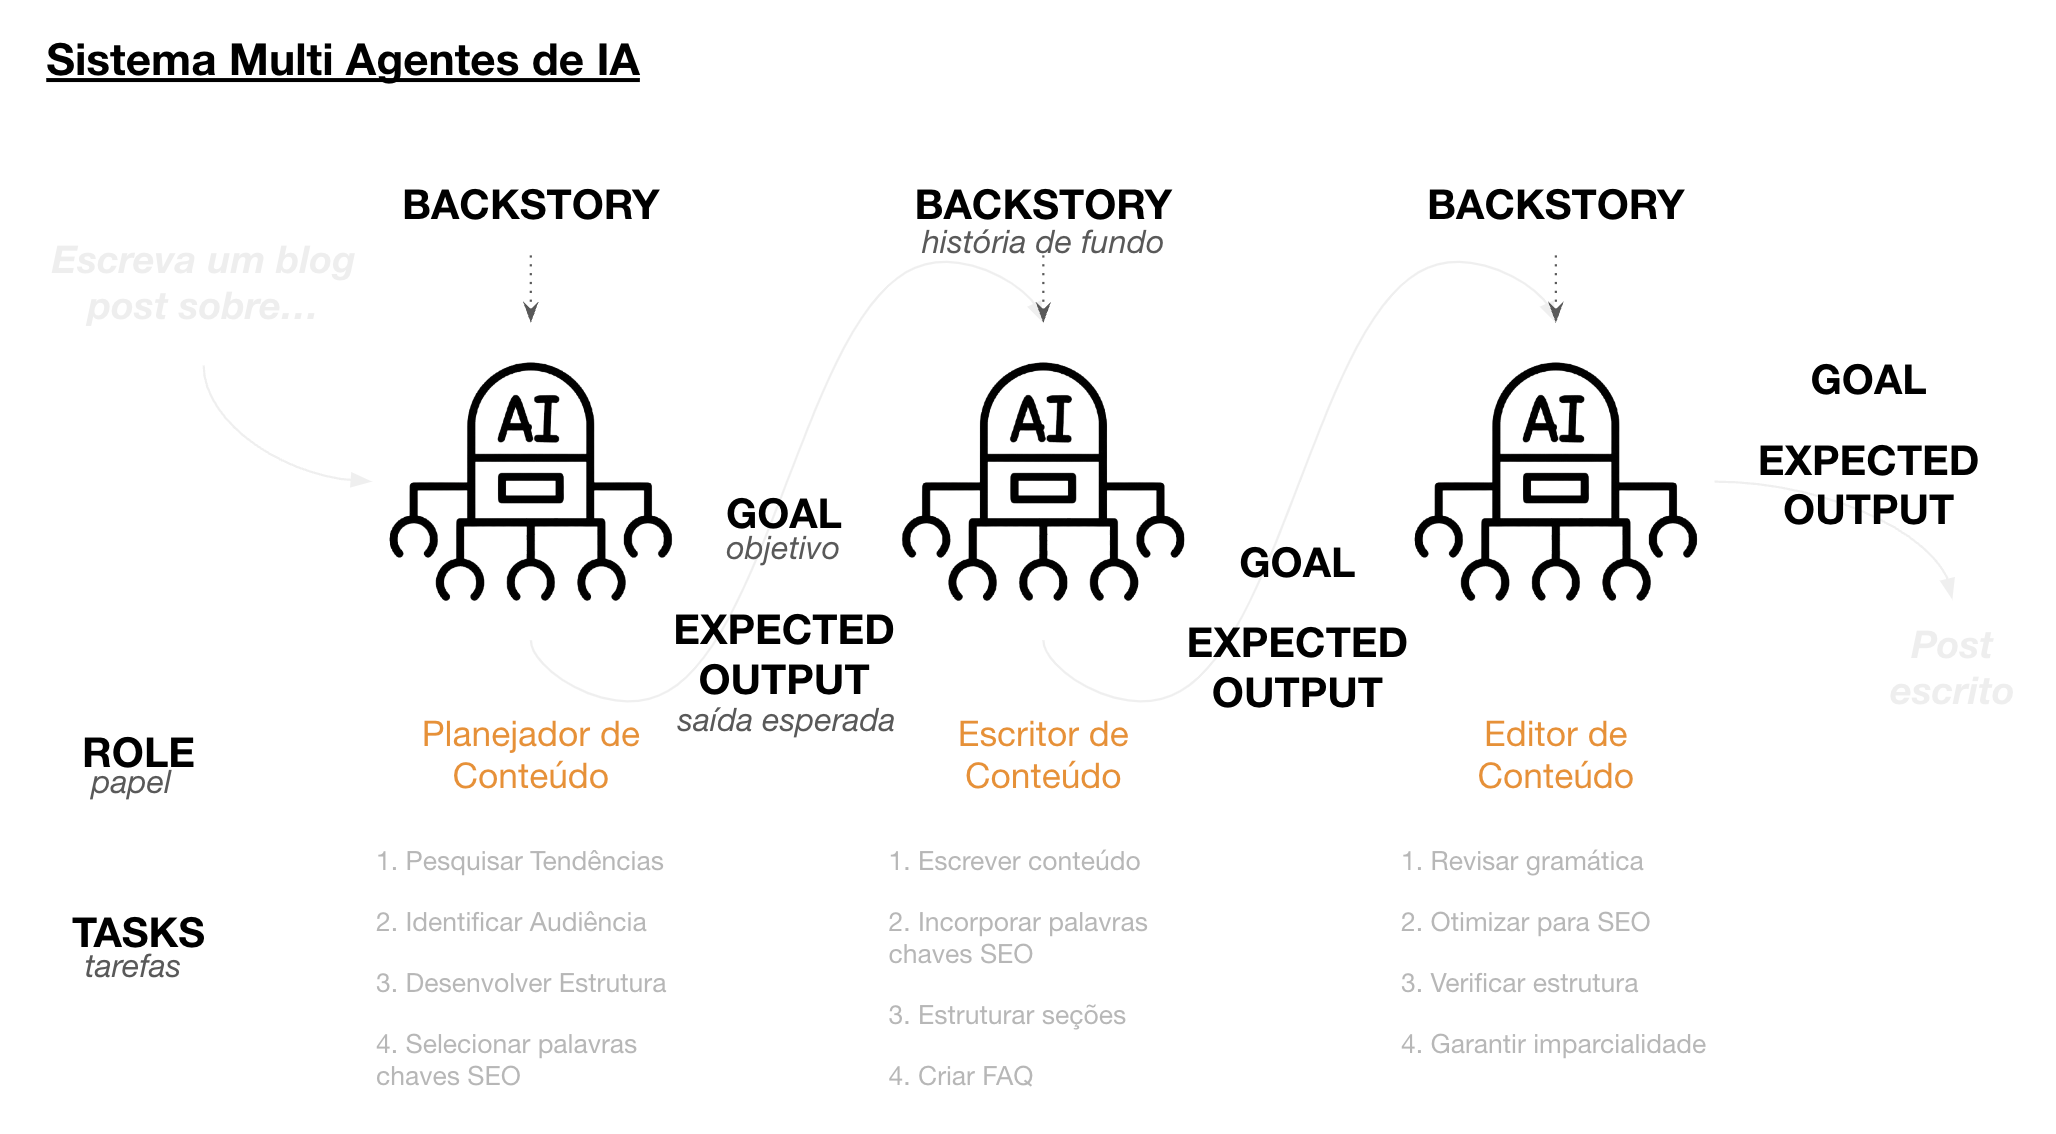

# Configurações iniciais

### Instale as bibliotecas necessárias

Aqui você encontra as bibliotecas de códigos para utilização:

- CrewAi
- CrewAI_Tools
- Langchain

In [ ]:
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

### Importe as ferramentas do CrewAI (library)

In [ ]:
from crewai import Agent, Task, Crew

### Configure o Modelo de LLM e a Chave da API (APIKey):

Como LLM para nosso agente, usaremos o 'gpt-3.5-turbo' da OpenAI. Você poderá utilizar quaisquer modelos disponíveis da OpenAI, por exemplo:
* gpt-4o
* gpt-4o-mini

Você pode também utilizar outros LLMs.

A API Key deve ser configurada ao clicar na "chave" no menu vertical à esquerda, no campo "Secrets".

In [ ]:
import os
from google.colab import userdata
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

# 1. Criação dos Agentes

- Defina seus agentes, identificando seu papel (`role`), objetivo (`goal`) e a história dele (`backstory`). O objetivo do `backstory` é capturar a essência do agente de forma eficiente, mantendo o texto fácil de ler e processar.
- O pensamento na forma de Agente é o caminho pelo qual os modelos de IA estão evoluindo, a ver pela divulgação do modelo da OpenAI o1.

  

## 1.1 Agent: Planejador

O Agente com a tarefa de planejar a estrutura do texto.

In [ ]:
planner = Agent(
    role="Planejador de Conteúdo",
    goal="Planeje um artigo engajador e preciso factalmente para blog sobre o tópico {topic}",
    backstory="Você está trabalhando no planejamento de "
              "um artigo de blog sobre o tema: {topic}. "
              "Você coleta informações que ajudam "
              "o público a aprender algo e "
              "tomar decisões informadas. Seu trabalho "
              "é a base para o Redator de Conteúdo "
              "escrever um artigo sobre este tema.",
    allow_delegation=False,
	verbose=True
)

## 1.2 Agent: Escritor

O Agente com a tarefa de escrever o texto.

In [ ]:
writer = Agent(
    role="Escritor de Conteúdo",
    goal="Escreva uma artigo inteligente, "
         "factualmente preciso e otimizado para SEO "
         "sobre o seguinte tópico: {topic}",
    backstory="Você está trabalhando na escrita "
              "de um novo artigo otimizado para SEO sobre o tema: "
              "{topic}. Você baseia sua escrita no trabalho "
              "do Planejador de Conteúdo, que fornece "
              "um resumo e o contexto relevante sobre o tema. "
              " Você segue os principais objetivos e direção "
              "do esboço, conforme fornecido pelo Planejador de Conteúdo. "
              "Você também fornece insights objetivos e imparciais "
              "e os fundamenta com informações fornecidas "
              "pelo Planejador de Conteúdo. ",
    allow_delegation=False,
    verbose=True
)

## 1.3 Agent: Editor

O Agente com a tarefa de revisar a qualidade do texto.

In [ ]:
editor = Agent(
    role="Editor de conteúdo",
    goal="Edite um blog post alinhado com as melhores "
         "práticas de SEO para artigos de blogs. ",
    backstory="Você é um editor que recebe um blog post "
              "do escritor de conteúdo. "
              "Seu objetivo é revisar o blog post "
              "para assegurar que ele segue as melhores "
              "práticas jornalisticas para artigos rankear bem nos SERP, "
              "oferece pontos de vistas balanceados "
              "quando prover opiniões e asserções, "
              "e também evita grandes controversias sobre os tópicos "
              "ou opiniões, quando possível.",
    allow_delegation=False,
    verbose=True
)

# 2. Criação das Tarefas dos Agentes

- Define your Tasks, and provide them a `description`, `expected_output` and `agent`.

## 2.1 Task: Planejar

In [ ]:
plan = Task(
    description=(
        "1. Priorize as últimas tendencias, atores chaves, palavras-chaves "
            "e notícias relevantes sobre o tópico {topic}.\n"
        "2. Identifique a audiência alvo, considerando "
            "seus interesses e maiores necessidades.\n"
        "3. Desenvolva uma estrutura detalhada do artigo incluindo "
            "introdução, pontos chaves e chamada para a ação.\n"
        "4. Inclua palavras chaves relevantes para SEO e  "
            "dados e fontes relevantes. Não invente informações."
    ),
    expected_output="Um plano de conteúdo extensivo "
        "contendo estrutura do artigo, analise de audiência, "
        "palavras chaves para SEO e demais recursos necessários.",
    agent=planner,
)

## 2.2 Task: Escrever

In [ ]:
write = Task(
    description=(
        "1. Utilize o plano de conteúdo para escrever "
            "um post de blog sobre o {topic}.\n"
        "2. Incorpore palavras chaves de SEO ao longo do texto.\n"
		    "3. Seções e subtítulos devem ser propriamente elencadas "
            "de maneira engajante.\n"
        "4. Assegure-se que o post é estruturado de "
            "com uma introdução engajante, corpo de texto com insights "
            "uma conclusão que sumarize o conteúdo "
            "e um FAQ de 6 perguntas e respostas.\n"
        "5. O texto precisa ser gramaticalmente sem erros "
            "e com frases relativamente curtas.\n"
    ),
    expected_output="Um post para blog bem escrito "
        "em um formato markdwon, pronto para publicação, "
        "cada seção deve conter 2 ou 3 paragrafos.",
    agent=writer,
)

## 2.3 Task: Editar

In [ ]:
edit = Task(
    description=("Prova de leitura de um post para blog "
                 "gramaticalmente sem erros "
                 "e forte para ranking em SERP."),
    expected_output="Um blog post bem escrito em um formato markdown, "
                    "pronto para publicação, "
                    "cada seção deve conter de 2 a 3 paragrafos.",
    agent=editor
)

# 3. Organização do trabalho em equipe `Crew` dos Agentes de IA

- Criação da equipe `crew` de Agentes
- Informar as tasks a ser performada pelos agentes
    - **Note**: *Para este simples exemplo*, as tasks serão realizadas sequencialmente (ou seja, depende da ordem umas das outras). Isso significa que a _ordem_ das tarefas `tasks` da lista _é importante_.
- `verbose=2` permite ver os logs de execução.

In [ ]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=2
)

# 4. Iniciando o trabalho da equipe `Crew`

**Nota**: LLMs são modelos probabilísticos e suas respostas variam a cada novo prompt, exceto quando parametrizado para respostas determinísticas. Ou seja, quando você fizer seus agentes de IA, as respostas irão variar do que foi mostrado aqui neste vídeo.

In [ ]:
result = crew.kickoff(inputs={"topic": "Meias de Algodão"})

- Display the results of your execution as markdown in the notebook.

In [ ]:
from IPython.display import Markdown
Markdown(result)